In [1]:
# Import modules
import pandas as pd
import numpy as np

from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Machine learning modules
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score



In [2]:
df1=pd.read_csv('power_1y.csv')
df2=pd.read_csv('FMI_100949_weather_2017-04-01_2018-04-01-EmptyColsRemoved-1readperhour_minusHeader.csv',sep=';')
#df2.fillna(value=0,axis=1)
df3=pd.read_csv('irradiation-1y.csv',sep=';')
df4=pd.read_csv('airquality_municipality_csv.csv')
#df4.fillna(0)
"""df3
# Columns:
# 1. Observation period (ISO 8601)	
# 2. TOA. Irradiation on horizontal plane at the top of atmosphere (Wh/m2)	
# 3. Clear sky GHI. Clear sky global irradiation on horizontal plane at ground level (Wh/m2)	
# 4. Clear sky BHI. Clear sky beam irradiation on horizontal plane at ground level (Wh/m2)	
# 5. Clear sky DHI. Clear sky diffuse irradiation on horizontal plane at ground level (Wh/m2)	
# 6. Clear sky BNI. Clear sky beam irradiation on mobile plane following the sun at normal incidence (Wh/m2)	

"""

"""#df2
yy	mm	dd	HH	MM	SS	temperature	wind speed	wind gust	wind direction	relative humidity	dew point temperature	the depth of the snow at the station location	atmospheric pressure	horizontal visibility	cloud cover (1/8)	present weather
"""

'#df2\nyy\tmm\tdd\tHH\tMM\tSS\ttemperature\twind speed\twind gust\twind direction\trelative humidity\tdew point temperature\tthe depth of the snow at the station location\tatmospheric pressure\thorizontal visibility\tcloud cover (1/8)\tpresent weather\n'

In [5]:
df1.head()

,6
0,5
1,9
2,21
3,20
4,50


In [6]:

df2.tail()

,2017,04,01,00,00.1,00.2,1.0,2.7,4.3,134.0,86.0,-1.1,0.0,1016.6,50000.0,8.0,0.0.1
8754,2018,3,31,19,0,0,-1.0,1.7,2.4,334.0,50.0,-10.2,9.0,1011.7,50000.0,7.0,0.0
8755,2018,3,31,20,0,0,-3.2,0.0,0.9,0.0,63.0,-9.2,9.0,1012.0,50000.0,4.0,0.0
8756,2018,3,31,21,0,0,-3.6,0.6,1.6,285.0,65.0,-9.2,9.0,1012.2,50000.0,0.0,0.0
8757,2018,3,31,22,0,0,-4.9,0.0,0.6,0.0,76.0,-8.5,9.0,1012.2,49620.0,0.0,0.0
8758,2018,3,31,23,0,0,-5.5,0.5,0.9,359.0,78.0,-8.6,9.0,1012.2,40800.0,0.0,0.0


In [7]:
df3.head()
df3.tail()

,2017-04-01T00:00:00.0/2017-04-01T00:15:00.0,0.0000,0.0000.1,0.0000.2,0.0000.3,0.0000.4
8754,2018-03-31T19:00:00.0/2018-03-31T19:15:00.0,0.0,0.0,0.0,0.0,0.0
8755,2018-03-31T20:00:00.0/2018-03-31T20:15:00.0,0.0,0.0,0.0,0.0,0.0
8756,2018-03-31T21:00:00.0/2018-03-31T21:15:00.0,0.0,0.0,0.0,0.0,0.0
8757,2018-03-31T22:00:00.0/2018-03-31T22:15:00.0,0.0,0.0,0.0,0.0,0.0
8758,2018-03-31T23:00:00.0/2018-03-31T23:15:00.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#df4.tail()

In [3]:
feature3=pd.DataFrame()

feature2=pd.DataFrame()

#feature4=pd.DataFrame()

In [4]:
#feature3=df3.values[:,[1,2,3,4,5]]
feature3=pd.DataFrame(data=df3.values[:,[1,2,3,4,5]])
feature2=pd.DataFrame(data=df2.values[:,[6,7,8,9,10,11,12,13,14,15,16]])
#feature4=pd.DataFrame(data=df4.values[:,[5,6]])

In [11]:
feature3.head()

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,3.9348,0.8721,0.0377,0.8344,1.0274
4,47.6904,21.8481,10.555,11.2931,75.1354


In [12]:
feature2.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,3.1,5.0,140.0,87.0,-0.9,0.0,1015.8,50000.0,8.0,0.0
1,1.4,3.5,5.1,143.0,85.0,-0.9,0.0,1015.1,50000.0,8.0,0.0
2,1.4,3.3,4.9,146.0,85.0,-0.8,0.0,1014.2,50000.0,8.0,0.0
3,1.4,4.1,6.5,141.0,87.0,-0.5,0.0,1013.3,42620.0,8.0,52.0
4,1.2,4.0,6.9,145.0,92.0,0.1,0.0,1012.6,11940.0,8.0,52.0


In [13]:
feature4.tail()

,0,1
8754,29,47
8755,40,45.8
8756,39,43.1
8757,66,79.5
8758,87,121.6


In [5]:
feature=pd.DataFrame()
#feature.columns=['BHI','Temperature','Wind Speed','Wind Gust','Wind Direction','Relative Humidity','Dew Point Temperature','Snow Depth','Atmospheric Pressure','Horizontal Visibility','Cloud Cover','Present Weather']
#feature

In [6]:
df4.head()

,2017,4,1,0:00,UTC,10,8
0,2017,4,1,1:00,UTC,8.0,7.5
1,2017,4,1,2:00,UTC,8.0,6.6
2,2017,4,1,3:00,UTC,9.0,8.5
3,2017,4,1,4:00,UTC,14.0,7.5
4,2017,4,1,5:00,UTC,11.0,3.8


In [7]:
feature['TOA']=feature3.values[:,0]
feature['GHI']=feature3.values[:,1]
feature['BHI']=feature3.values[:,2]
feature['DHI']=feature3.values[:,3]
feature['BNI']=feature3.values[:,4]
feature['temperature']=feature2.values[:,0]
feature['wind speed']=feature2.values[:,1]
feature['wind direction']=feature2.values[:,3]
feature['Relative humidity']=feature2.values[:,4]
feature['snow depth']=feature2.values[:,6]
feature['atmospheric pressure']=feature2.values[:,7]
feature['horizontal visibility']=feature2.values[:,8]
feature['cloud cover']=feature2.values[:,9]
feature['present weather']=feature2.values[:,10]
#feature['Nitrogen dioxide ']=feature4.values[:,0]
#feature['Particulate matter']=feature4.values[:,1]
feature['Power Output']=df1.values[:,0]


In [8]:
feature_copy=feature.copy()
del feature_copy['Power Output']

In [ ]:
feature_copy.head()

In [ ]:
feature.head()

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

In [10]:
# Machine learning modules
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

Text(0.5,1,'Correlation between features')

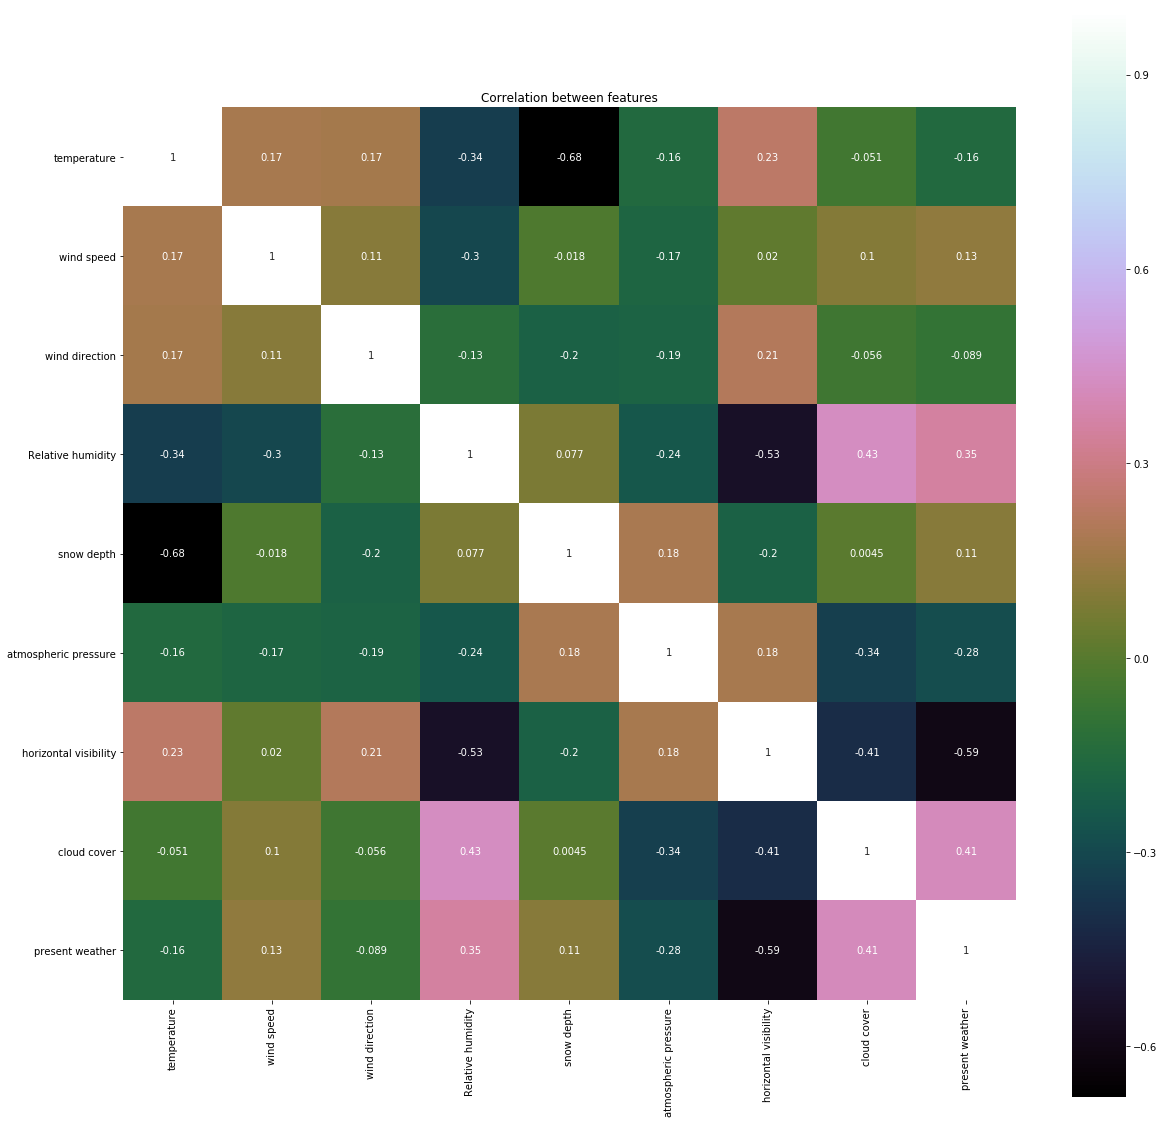

In [11]:
# Pairwise correlation heatmap
corr = feature_copy.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, vmax=1, square=True, annot=True, cmap='cubehelix')
plt.title('Correlation between features')

In [ ]:
feature_copy.head()

In [ ]:
plt.matshow(feature_copy.corr())

In [27]:
feature.head(10)

,TOA,GHI,BHI,DHI,BNI,temperature,wind speed,wind direction,Relative humidity,snow depth,atmospheric pressure,horizontal visibility,cloud cover,present weather,Nitrogen dioxide,Particulate matter,Power Output
0,0,0,0,0,0,1.0,3.1,140.0,87.0,0.0,1015.8,50000.0,8.0,0.0,8,7.5,5
1,0,0,0,0,0,1.4,3.5,143.0,85.0,0.0,1015.1,50000.0,8.0,0.0,8,6.6,9
2,0,0,0,0,0,1.4,3.3,146.0,85.0,0.0,1014.2,50000.0,8.0,0.0,9,8.5,21
3,3.9348,0.8721,0.0377,0.8344,1.0274,1.4,4.1,141.0,87.0,0.0,1013.3,42620.0,8.0,52.0,14,7.5,20
4,47.6904,21.8481,10.555,11.2931,75.1354,1.2,4.0,145.0,92.0,0.0,1012.6,11940.0,8.0,52.0,11,3.8,50
5,89.9252,53.0886,35.1672,17.9214,133.401,1.3,4.6,144.0,95.0,0.0,1011.6,15210.0,8.0,61.0,16,3.8,70
6,127.658,79.4632,50.206,29.2572,134.166,1.4,5.3,143.0,96.0,0.0,1010.5,16090.0,8.0,61.0,19,3.7,89
7,158.322,101.232,61.205,40.0274,131.879,2.1,5.2,143.0,96.0,0.0,1009.5,13730.0,8.0,81.0,15,2.9,131
8,179.833,116.424,67.857,48.5673,128.712,2.5,4.8,144.0,97.0,0.0,1008.5,3290.0,8.0,10.0,16,3.1,145
9,190.73,127.065,78.3307,48.7345,140.092,3.0,4.2,146.0,98.0,0.0,1007.5,2160.0,8.0,10.0,19,4.1,150


In [ ]:
def Model_CV(arg,X,Y):
    scores=cross_val_score(arg,X,Y,cv=20, scoring='neg_mean_squared_error')     #negative MSE
    #scores=Model_CV(arg,fmi[Var[:,[5,6,7,8,9,12]],fmi[Var[11]])
    return scores.mean()

In [ ]:
# LinearRegression
# Simplest model
arg=LinearRegression()
Model_CV(arg,feature.values[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]],feature.values[:,16])

In [ ]:
#Lasso Regression
# Control of overfitting
a=np.linspace(0.1,1,num=10)
for i in a:
    arg=Lasso(alpha=i,random_state=2017)
    score=Model_CV(arg,feature.values[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]],feature.values[:,-1])
    print (i, score);

In [ ]:
# Ridge Regression
# Control of overfitting
a=np.linspace(0.1,1,num=10)
for i in a:
    arg=Ridge(alpha=i,random_state=2017)
    score=Model_CV(arg,feature.values[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]],feature.values[:,-1])
    print (i, score)

In [ ]:
# RandomForestRegressor
arg=RandomForestRegressor(n_estimators=100, random_state=2017)
Model_CV(arg,feature.values[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]],feature.values[:,-1])

In [ ]:
# SVR(Support Vector Regression)
arg=SVR(kernel="linear")
Model_CV(arg,feature.values[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]],feature.values[:,-1])

In [18]:
from sklearn.svm import SVR

In [24]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
model = linear_model.LogisticRegression()
model2=linear_model.Lasso()
model3=linear_model.Ridge()
model4=SVR(C=1.0, epsilon=0.2)
model5=RandomForestRegressor()
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

X=feature.values[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

y=feature.values[:,-1]
y=y.astype('int')
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train=X[:-24 , :]
X_test=X[-24: , :]
y_train=y[:-24]
y_test=y[-24:]

model.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)
model5.fit(X_train,y_train)
# Make predictions using the testing set
powerOutput_y_pred = model.predict(X_test)
ypred_lasso=model2.predict(X_test)
ypred_ridge=model3.predict(X_test)
ypred_svr=model4.predict(X_test)
ypred_rf=model5.predict(X_test)
print ("For Logistic Regression:")
print (powerOutput_y_pred)
# The coefficients
#print('Coefficients: \n', model.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, powerOutput_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, powerOutput_y_pred))

print("\n")
print ("For Lasso Regression:")
print (ypred_lasso)
#print('Coefficients: \n',model2.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, ypred_lasso))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, ypred_lasso))


print("\n")
print ("For Ridge Regression:")
print (ypred_ridge)
#print('Coefficients: \n',model3.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, ypred_ridge))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, ypred_ridge))

print("\n")
print("For Random Forrest Regressor:")
print(ypred_rf)

print("\n")
print ("For SVM Regression:")
print (ypred_svr)
#print('Coefficients: \n',model4.coef_)



/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


For Logistic Regression:
[  1   1   1   1   1  60 139 139 139 136 136 136 136 136 136  67  67   1
   1   1   1   1   1   1]
Mean squared error: 1001.54
Variance score: 0.65


For Lasso Regression:
[  15.22208144   17.38426271   20.84078453   20.58678936   22.9144501
   83.81241362  109.6813174   119.11050056  126.53994294  131.32443665
  130.61126365  129.83918299  129.53552225  131.74836028  111.03924846
   92.53239042   59.05801364   18.244551     24.31832649   24.4139922
   16.83729155   12.82132216   12.76287177   15.14972825]
Mean squared error: 617.32
Variance score: 0.78


For Ridge Regression:
[  12.55148225   14.90604386   18.36058403   18.4292006    20.15448884
   82.94619054  111.59903257  122.54408288  131.04665354  136.42351406
  135.57327391  134.63422628  134.16086245  136.99583551  114.15178004
   93.10051178   56.00279341   16.2980466    23.07454827   23.03181465
   14.5312144    10.34281507   10.1713134    12.5817213 ]
Mean squared error: 636.28
Variance score: 0.78



In [27]:
df1.head(24)

,6
0,5
1,9
2,21
3,20
4,50
5,70
6,89
7,131
8,145
9,150


In [ ]:
#print(X_train)
print (X_test)
#print (y_train)
print (y_test)

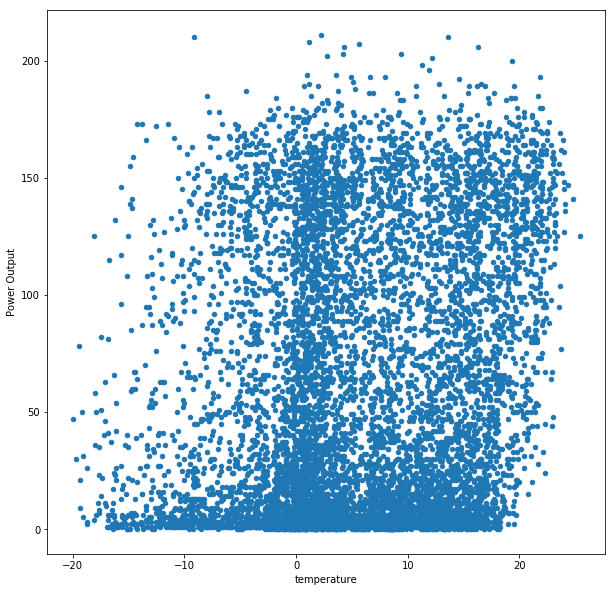

In [19]:
# Show the effect of "temperature" on "Power Output".
feature.plot(kind="scatter", x="temperature", y="Power Output", figsize=(10, 10))

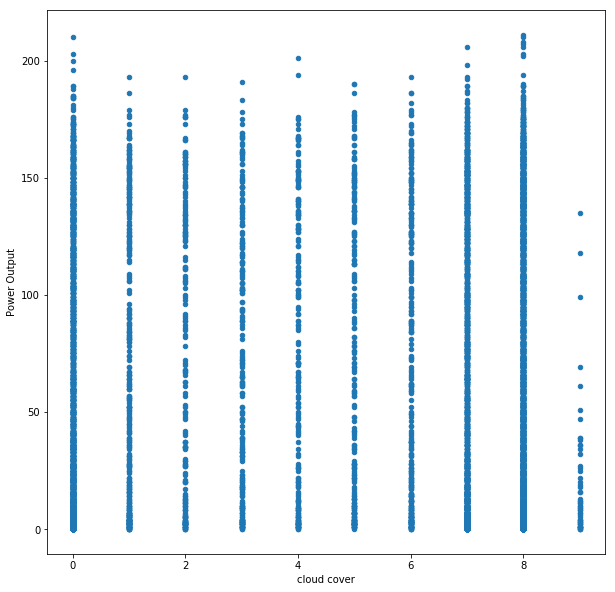

In [20]:
feature.plot(kind="scatter", x="cloud cover", y="Power Output", figsize=(10, 10))

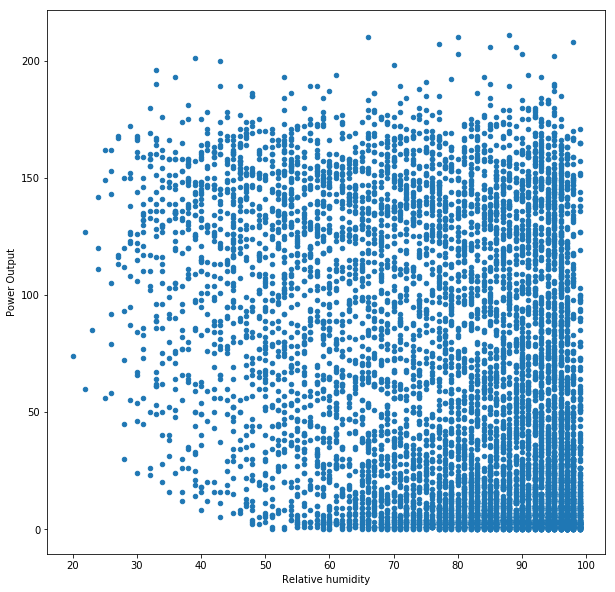

In [21]:
feature.plot(kind="scatter", x="Relative humidity", y="Power Output", figsize=(10, 10))

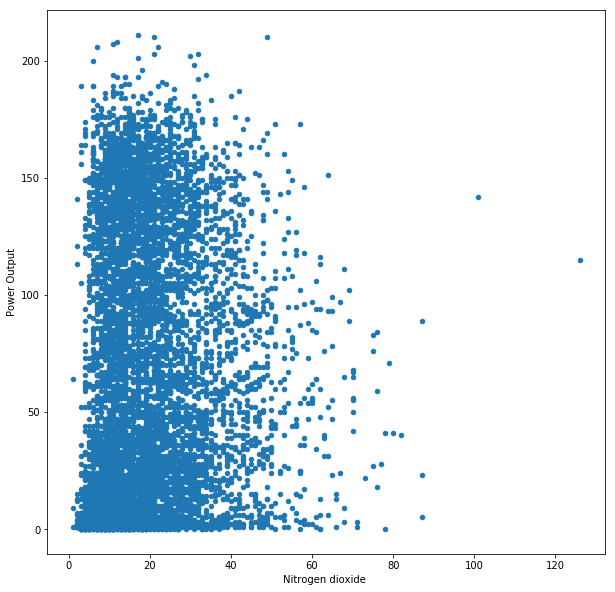

In [18]:
feature.plot(kind="scatter", x="Nitrogen dioxide ", y="Power Output", figsize=(10, 10))

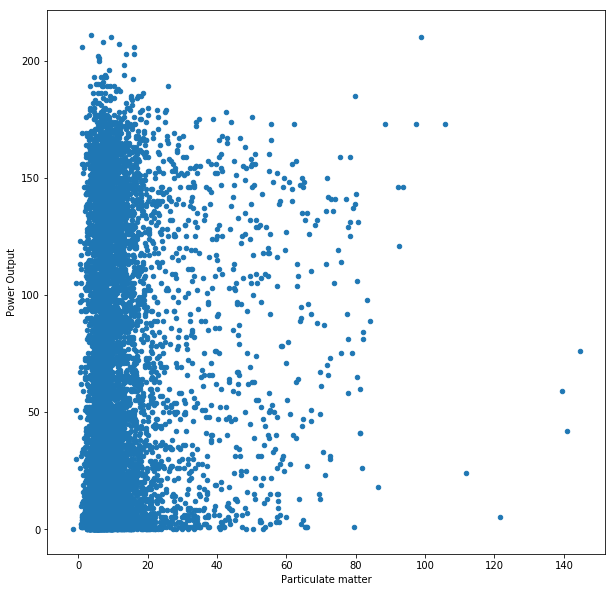

In [17]:
feature.plot(kind="scatter", x="Particulate matter", y="Power Output", figsize=(10, 10))